In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

import warnings
warnings.filterwarnings("ignore")
    
time_max = 250
PI = np.pi

m_range = [0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]

In [2]:
def read_data (filename, skip_rows = 9, treshold = 6):

    m_range = [0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]

    df = pd.read_csv( filename, skiprows = skip_rows, names= m_range)
    df.drop( [0, 150, 160], axis = 1, inplace = True)

    df.dropna(inplace = True)
    
    while len(df[10]) > 400:
        #print(len(df[10]))
        df.drop( [len(df[10])-20], axis = 0, inplace = True)
    
    if len(df[10]) < 400:
        print("WARNING! Less than 400 samples in file: {:}, k = {:}".format(filename, len(df[10])))
    
    return df #df.astype(dtype = 'int32')

In [3]:
df_9 = read_data('n9c15X50l1.csv')
df_18 = read_data('n18c15X50l1.csv')
df_45 = read_data('n45c15X50l1.csv')
df_90 = read_data('n90c15X50l1.csv')
df_180 = read_data('n180c15X50l1.csv')
df_450 = read_data('n450c15X50l1.csv')
df_900 = read_data('n900c15X50l1.csv')

df_0 = read_data('n0c15X50l1.csv')

In [4]:
def get_lists(df):
    
    tab = []
    
    tab.append(np.array(df[5]))
    tab.append(np.array(df[10]))
    tab.append(np.array(df[20]))
    tab.append(np.array(df[30]))
    tab.append(np.array(df[40]))
    tab.append(np.array(df[50]))
    tab.append(np.array(df[60]))
    tab.append(np.array(df[70]))
    tab.append(np.array(df[80]))
    tab.append(np.array(df[90]))
    tab.append(np.array(df[100]))
    tab.append(np.array(df[110]))
    tab.append(np.array(df[120]))
    tab.append(np.array(df[130]))
    tab.append(np.array(df[140]))
        
    return tab

In [5]:
def get_counter(data):
    
    counter_tab = (np.zeros(time_max))

    for t in data:
        counter_tab[t] = counter_tab[t] +1

    if sum(counter_tab)!= 400:
        print("STH GOES WRONG!\n")

    min = 0
    max = time_max

    for i in range(time_max):
        min = i
        if counter_tab[i] != 0 :
            break

    for i in range(time_max-1, 0, -1):
        max = i
        if counter_tab[i] != 0 :
            break

    #print(min, max)
    df = pd.DataFrame( counter_tab, columns = ['counter'],  dtype = int)
    df['value'] = np.arange(time_max)
    
    if (min >1):
        lower_lim = np.arange(0, min)
    #    df.drop(lower_lim, axis = 0, inplace = True)
    
    if (max < time_max - 5):
        upper_lim = np.arange(max, time_max)
        #df.drop(upper_lim, axis = 0, inplace = True)
    

    
    return df


In [21]:
tabs = get_lists(df_9)
df=get_counter(tabs[5])

# FITTOWANIE

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \cdot exp\left[ \frac{-\left(x-\mu\right)^2  }{2\sigma^2} \right]$$

In [7]:
def fit_gauss(x,  sigma, mu):
    return  (1/(np.sqrt(2*PI)*sigma) * np.exp(-(x - mu)**2 / (2*sigma**2) ))

In [8]:
def fit_laplace(x, a,b):
    return  (1/(2*b) * np.exp(-abs(x - a) / b ))

In [9]:
def fit_gumbel(x, beta, mu):
    return  (1/(beta) / np.exp( (x-mu)/beta + np.exp((mu-x)/beta ) ))   

In [10]:
def fit_gauss_OFFSET(x, sigma, mu, offset):
    return  (1/(np.sqrt(2*PI)*sigma) * np.exp(-(x - mu)**2 / (2*sigma**2) )+offset)

In [11]:
def fit_laplace_OFFSET(x, a, b, offset):
    return  (1/(2*b) * np.exp(-abs(x - a) / b )+offset)

In [12]:
xdata = df['value']
ydata = df['counter']

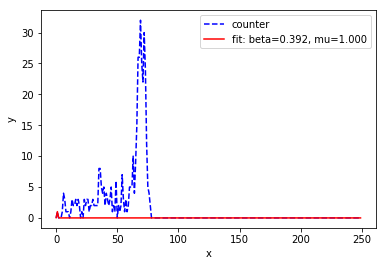

In [13]:
popt, pcov = curve_fit(fit_gauss, xdata, ydata)

plt.plot(xdata, ydata, 'b--')
plt.plot(xdata, fit_gauss(xdata, *popt), 'r-', label='fit: beta=%5.3f, mu=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

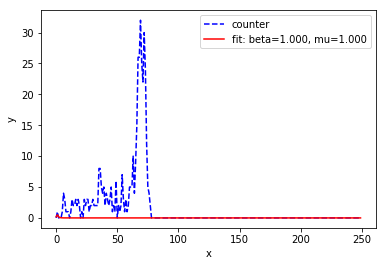

In [14]:
popt, pcov = curve_fit(fit_laplace, xdata, ydata)

plt.plot(xdata, ydata, 'b--')
plt.plot(xdata, fit_laplace(xdata, *popt), 'r-', label='fit: beta=%5.3f, mu=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

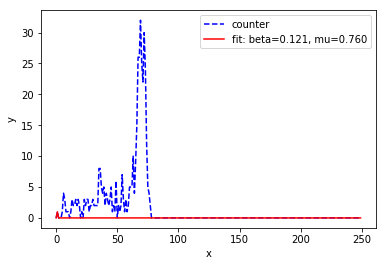

In [15]:
popt, pcov = curve_fit(fit_gumbel, xdata, ydata)

plt.plot(xdata, ydata, 'b--')
plt.plot(xdata, fit_gumbel(xdata, *popt), 'r-', label='fit: beta=%5.3f, mu=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [16]:
tabs = get_lists(df_9)
df=get_counter(tabs[11])

In [17]:
xdata = df['value']
ydata = df['counter']

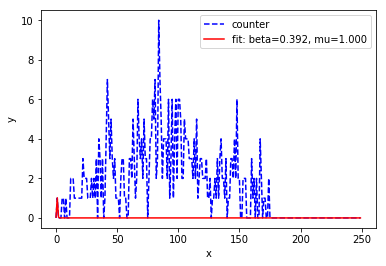

In [19]:
popt, pcov = curve_fit(fit_gauss, xdata, ydata)

plt.plot(xdata, ydata, 'b--')
plt.plot(xdata, fit_gauss(xdata, *popt), 'r-', label='fit: beta=%5.3f, mu=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

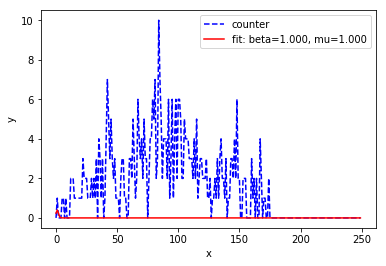

In [20]:
popt, pcov = curve_fit(fit_laplace, xdata, ydata)

plt.plot(xdata, ydata, 'b--')
plt.plot(xdata, fit_gauss(xdata, *popt), 'r-', label='fit: beta=%5.3f, mu=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()